<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.6
## Feature Encoding

### Data

**Predict the chronic kidney disease.**

This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.

We use the following representation to collect the dataset 
- age	-	age	
- bp	-	blood pressure 
- sg	-	specific gravity 
- al	- albumin 
- su	-	sugar 
- rbc	-	red blood cells 
- pc	-	pus cell 
- pcc	-	pus cell clumps 
- ba	-	bacteria 
- bgr	-	blood glucose random 
- bu	-	blood urea 
- sc	-	serum creatinine 
- sod	-	sodium 
- pot	-	potassium 
- hemo	-	hemoglobin 
- pcv	-	packed cell volume 
- wc	-	white blood cell count 
- rc	-	red blood cell count 
- htn	-	hypertension 
- dm	-	diabetes mellitus 
- cad	-	coronary artery disease 
- appet	-	appetite 
- pe	-	pedal edema 
- ane	-	anemia 
- class	-	class




[Chronic Kidney Disease DataSet](https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease)

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(rc={'figure.figsize': (15, 10)})

%matplotlib inline

#### 1. Load Data

In [2]:
# Read Data
kidney_disease_csv = 'dat/kidney_disease.csv'
kidney_disease = pd.read_csv(kidney_disease_csv)

#### 2. Perform EDA

Perform EDA. Check null values. Impute if necessary.

In [3]:
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

Populating the interactive namespace from numpy and matplotlib


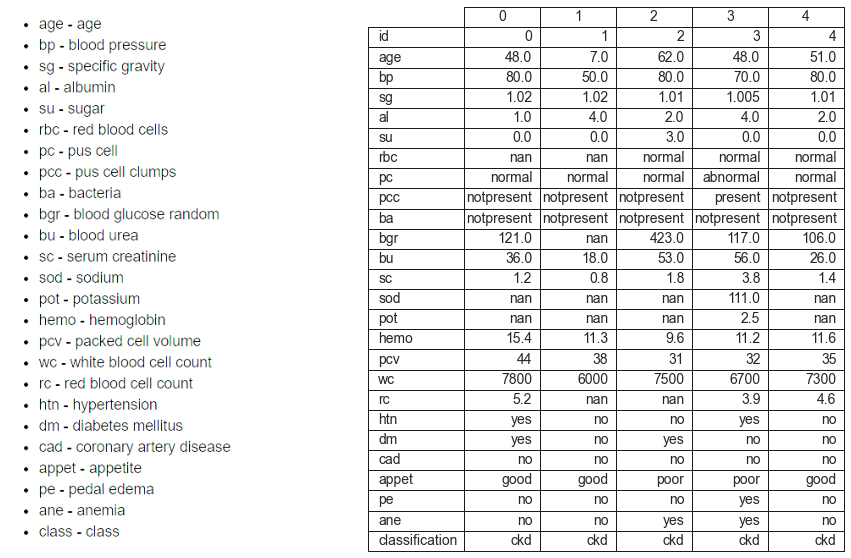

In [4]:
%pylab inline
import matplotlib.image as mpimg

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(121)
img = mpimg.imread('kidney_disease_definition.PNG')
ax1.imshow(img)
plt.axis('off')

ax2 = fig.add_subplot(122)
font_size=14
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = kidney_disease.head().T.values, rowLabels = kidney_disease.head().T.index, bbox=bbox, colLabels=kidney_disease.head().T.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)

In [5]:
kidney_disease['pcv'].value_counts()

41      21
52      21
44      19
48      19
40      16
43      14
45      13
42      13
33      12
50      12
32      12
28      12
36      12
37      11
34      11
29       9
46       9
30       9
35       9
31       8
24       7
39       7
26       6
38       5
51       4
53       4
54       4
47       4
49       4
25       3
22       3
27       3
23       2
19       2
14       1
\t?      1
16       1
18       1
9        1
15       1
\t43     1
20       1
21       1
17       1
Name: pcv, dtype: int64

In [6]:
kidney_disease['wc'].value_counts()

9800     11
6700     10
7200      9
9200      9
9600      9
         ..
11200     1
13600     1
10900     1
4100      1
12300     1
Name: wc, Length: 92, dtype: int64

In [7]:
kidney_disease['rc'].value_counts()

5.2    18
4.5    16
4.9    14
4.7    11
4.8    10
3.9    10
3.4     9
4.6     9
5.5     8
5.0     8
5.9     8
3.7     8
6.1     8
5.8     7
5.4     7
3.8     7
5.3     7
4.2     6
4.3     6
5.6     6
6.4     5
6.5     5
5.7     5
3.2     5
5.1     5
6.2     5
4.4     5
4.1     5
6.0     4
6.3     4
3.6     4
4.0     3
3.3     3
4       3
3.5     3
3.1     2
2.1     2
2.9     2
2.8     2
5       2
2.7     2
3.0     2
2.6     2
2.5     2
2.4     1
\t?     1
3       1
2.3     1
8.0     1
Name: rc, dtype: int64

In [8]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    kidney_disease['pcv'] = kidney_disease['pcv'].str.replace(char, '', regex=True)
    kidney_disease['wc'] = kidney_disease['wc'].str.replace(char, '', regex=True)
    kidney_disease['rc'] = kidney_disease['rc'].str.replace(char, '', regex=True)

In [9]:
len(kidney_disease['pcv'].unique())

45

In [10]:
len(kidney_disease['wc'].unique())

93

In [11]:
len(kidney_disease['rc'].unique())

50

In [12]:
kidney_disease.wc.str.extract?

In [13]:
#kidney_disease['wc'].str.extract('(\t)')

In [14]:
kidney_disease.replace({'pcv': ('^.t'), 'wc': ('^.t'), 'rc': ('^.t')}, {'pcv': '','wc': '','rc': ''}, regex=True, inplace=True)

In [15]:
print(len(kidney_disease['pcv'].unique()))
kidney_disease['pcv'].unique()

45


array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [16]:
print(len(kidney_disease['wc'].unique()))
kidney_disease['wc'].unique()

93


array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [17]:
print(len(kidney_disease['rc'].unique()))
kidney_disease['rc'].unique()

50


array(['52', nan, '39', '46', '44', '5', '40', '37', '38', '34', '26',
       '28', '43', '32', '36', '4', '41', '49', '25', '42', '45', '31',
       '47', '35', '60', '50', '21', '56', '23', '29', '27', '80', '33',
       '30', '3', '24', '48', '\t', '54', '61', '62', '63', '51', '58',
       '55', '53', '64', '57', '59', '65'], dtype=object)

In [20]:
# CLean pcv
kidney_disease['pcv'] = pd.to_numeric(kidney_disease['pcv'], errors='coerce')

In [22]:
# CLean wc
kidney_disease['wc'] = pd.to_numeric(kidney_disease['wc'], errors='coerce')

In [23]:
# CLean rc
kidney_disease['rc'] = pd.to_numeric(kidney_disease['rc'], errors='coerce')

In [24]:
# Clean dm
kidney_disease['dm'] = kidney_disease['dm'].apply(lambda x: 'no' if x == '\tno' else x)
kidney_disease['dm'] = kidney_disease['dm'].apply(lambda x: 'yes' if x == '\tyes' else x)
kidney_disease['dm'] = kidney_disease['dm'].str.strip()

In [25]:
# Clean cad
kidney_disease['cad'] = kidney_disease['cad'].apply(lambda x: 'no' if x == '\tno' else x)

In [27]:
# Clean classification
kidney_disease['classification'] = kidney_disease['classification'].apply(lambda x: 'ckd' if x == 'ckd\t' else x)

In [28]:
for c in kidney_disease.select_dtypes(np.object):
    print(c)
    print(kidney_disease[c].value_counts())
    print('-'*50)

rbc
normal      201
abnormal     47
Name: rbc, dtype: int64
--------------------------------------------------
pc
normal      259
abnormal     76
Name: pc, dtype: int64
--------------------------------------------------
pcc
notpresent    354
present        42
Name: pcc, dtype: int64
--------------------------------------------------
ba
notpresent    374
present        22
Name: ba, dtype: int64
--------------------------------------------------
htn
no     251
yes    147
Name: htn, dtype: int64
--------------------------------------------------
dm
no     261
yes    137
Name: dm, dtype: int64
--------------------------------------------------
cad
no     364
yes     34
Name: cad, dtype: int64
--------------------------------------------------
appet
good    317
poor     82
Name: appet, dtype: int64
--------------------------------------------------
pe
no     323
yes     76
Name: pe, dtype: int64
--------------------------------------------------
ane
no     339
yes     60
Name: ane, dtype: i

In [29]:
kidney_disease.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [30]:
kidney_disease.set_index('id', inplace=True)

In [31]:
kidney_disease.head().T

id,0,1,2,3,4
age,48.0,7.0,62.0,48.0,51.0
bp,80.0,50.0,80.0,70.0,80.0
sg,1.02,1.02,1.01,1.005,1.01
al,1.0,4.0,2.0,4.0,2.0
su,0.0,0.0,3.0,0.0,0.0
rbc,NaN,NaN,normal,normal,normal
pc,normal,normal,normal,abnormal,normal
pcc,notpresent,notpresent,notpresent,present,notpresent
ba,notpresent,notpresent,notpresent,notpresent,notpresent
bgr,121.0,NaN,423.0,117.0,106.0


In [32]:
kidney_disease.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [33]:
kidney_disease.duplicated().sum()

0

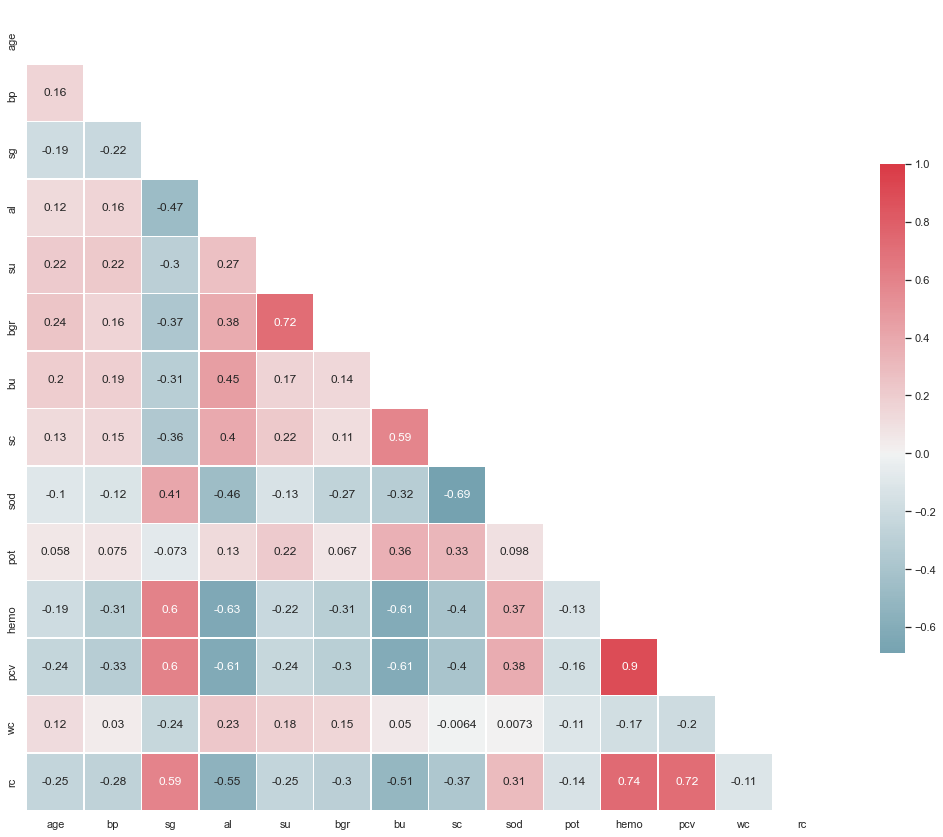

In [35]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(kidney_disease.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(kidney_disease.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

#### Impute Null Values

Impute null values for numeric and object columns.

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
def impute_null(df, column_name, srategy='median'):
    imputer = SimpleImputer(missing_values = np.NaN, strategy = srategy)
    imputer = imputer.fit(df[[column_name]])
    return imputer.transform(df[[column_name]])

In [38]:
for l in list(kidney_disease.select_dtypes(np.number).columns):
    kidney_disease[l] = impute_null(kidney_disease, l)

In [39]:
for l in list(kidney_disease.select_dtypes(np.object).columns):
    kidney_disease[l].fillna(kidney_disease[l].value_counts().index[0], inplace=True)

In [40]:
kidney_disease.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [41]:
kidney_disease.sample(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,46.0,no,no,no,good,no,no,ckd
235,45.0,70.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,113.0,...,26.0,5700.0,48.0,no,no,yes,good,no,yes,ckd
258,42.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,98.0,...,44.0,8400.0,55.0,no,no,no,good,no,no,notckd
94,65.0,70.0,1.010,0.0,0.0,normal,normal,notpresent,notpresent,93.0,...,36.0,11900.0,39.0,no,yes,no,good,no,no,ckd
104,55.0,90.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,143.0,...,40.0,8000.0,48.0,yes,yes,no,poor,yes,no,ckd
127,71.0,60.0,1.015,4.0,0.0,normal,normal,notpresent,notpresent,118.0,...,35.0,15200.0,43.0,yes,yes,no,poor,yes,no,ckd
259,35.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,104.0,...,45.0,4300.0,52.0,no,no,no,good,no,no,notckd
240,65.0,70.0,1.015,1.0,0.0,normal,normal,notpresent,notpresent,203.0,...,36.0,5000.0,41.0,yes,yes,no,poor,yes,no,ckd
287,39.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,124.0,...,43.0,8000.0,48.0,no,no,no,good,no,no,notckd


In [42]:
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              400 non-null    flo

#### 3. OPTION 1 - Label Encoder
Encode labels with value between 0 and n_classes-1.

> from sklearn.preprocessing import LabelEncoder

In [44]:
from sklearn.preprocessing import LabelEncoder

#### 4. OPTION 2 - Dummy Variables (pandas)

Convert categorical variable into dummy/indicator variables

In [43]:
# ANSWER
# Get dummies
kidney = pd.get_dummies(kidney_disease, prefix_sep='_', drop_first=True)
# X head
kidney.head().T

id,0,1,2,3,4
age,48.00,7.00,62.00,48.000,51.00
bp,80.00,50.00,80.00,70.000,80.00
sg,1.02,1.02,1.01,1.005,1.01
al,1.00,4.00,2.00,4.000,2.00
su,0.00,0.00,3.00,0.000,0.00
bgr,121.00,121.00,423.00,117.000,106.00
bu,36.00,18.00,53.00,56.000,26.00
sc,1.20,0.80,1.80,3.800,1.40
sod,138.00,138.00,138.00,111.000,138.00
pot,4.40,4.40,4.40,2.500,4.40


####  5. Set Target 

Set `classification` as target.

In [46]:
target_column = 'classification_notckd'
feature_columns = [c for c in kidney.columns if c != target_column]

In [47]:
feature_columns

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'rbc_normal',
 'pc_normal',
 'pcc_present',
 'ba_present',
 'htn_yes',
 'dm_yes',
 'cad_yes',
 'appet_poor',
 'pe_yes',
 'ane_yes']

In [48]:
y = kidney[target_column]
X = kidney[feature_columns]

In [49]:
X

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,1,1,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,1,1,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,1,1,0,0,0,0,0,0,0,0


In [50]:
y

id
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification_notckd, Length: 400, dtype: uint8

#### 6. Select Feature

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

##### 6.1 Univariate Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

- SelectKBest removes all but the  highest scoring features
- Use sklearn.feature_selection.chi2 as score function
    > Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.


More Reads:
[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

- Create an instance of SelectKBest
    - Use sklearn.feature_selection.chi2 as score_func
    - Use k of your choice
- Fit X, y 
- Find top 4 features
- Transform features to a DataFrame

In [51]:
# ANSWER
from sklearn.feature_selection import SelectKBest, chi2, RFE

# Create an instance of SelectKBest
kbest = SelectKBest(score_func=chi2, k=4)

In [52]:
# Fit 
fit = kbest.fit(X, y)

In [53]:
# Print Score 
# Find Top 4 Features
pd.DataFrame(fit.scores_, index=feature_columns)

,0
age,115.859940
bp,81.786701
sg,0.005035
al,216.000000
su,94.800000
bgr,2241.651289
bu,2343.097145
sc,357.792101
sod,27.558749
pot,2.951339


In [54]:
fit.get_support()

array([False, False, False, False, False,  True,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False])

In [55]:
final_columns = X.columns[fit.get_support()]

In [56]:
# Transform X to Features
features = fit.transform(X)

In [57]:
# Transform features to a dataframe
pd.DataFrame(features, columns = final_columns) 

,bgr,bu,sc,wc
0,121.0,36.0,1.2,7800.0
1,121.0,18.0,0.8,6000.0
2,423.0,53.0,1.8,7500.0
3,117.0,56.0,3.8,6700.0
4,106.0,26.0,1.4,7300.0
...,...,...,...,...
395,140.0,49.0,0.5,6700.0
396,75.0,31.0,1.2,7800.0
397,100.0,26.0,0.6,6600.0
398,114.0,50.0,1.0,7200.0


##### 6.2 Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

More Reads:
[Recursive feature elimination](https://scikit-learn.org/stable/modules/feature_selection.html)

- Use RFE to extract feature
    - use LogisticRegression as estimator
    - Number of n_features_to_select as of your choice
- Fit X, y to RFE
- Find Selected Features

In [58]:
# ANSWER
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=4)
fit = rfe.fit(X, y)
print("Num Features: %d", fit.n_features_) 
print("Selected Features: %s", fit.support_) 
print("Feature Ranking: %s", fit.ranking_)

F:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Num Features: %d 4
Selected Features: %s [False False False  True False False False  True False False False False
 False False False False False False  True  True False False False False]
Feature Ranking: %s [18 14 11  1  4 17 20  1 12 10  2  9 21 13  5  7 15 19  1  1 16  3  6  8]


In [59]:
# Print Score 
# Find Top 4 Features
pd.DataFrame(fit.support_, index=feature_columns)

,0
age,False
bp,False
sg,False
al,True
su,False
bgr,False
bu,False
sc,True
sod,False
pot,False


In [60]:
pd.DataFrame(fit.ranking_, index=feature_columns)

,0
age,18
bp,14
sg,11
al,1
su,4
bgr,17
bu,20
sc,1
sod,12
pot,10


In [61]:
final_columns =X.columns[fit.support_]

In [62]:
final_columns

Index(['al', 'sc', 'htn_yes', 'dm_yes'], dtype='object')

In [63]:
# Transform X to Features
features = fit.transform(X)

In [64]:
pd.DataFrame(features, columns=final_columns) 

,al,sc,htn_yes,dm_yes
0,1.0,1.2,1.0,1.0
1,4.0,0.8,0.0,0.0
2,2.0,1.8,0.0,1.0
3,4.0,3.8,1.0,0.0
4,2.0,1.4,0.0,0.0
...,...,...,...,...
395,0.0,0.5,0.0,0.0
396,0.0,1.2,0.0,0.0
397,0.0,0.6,0.0,0.0
398,0.0,1.0,0.0,0.0


#### Create multiple Classifier Model

Create multiple classifier models to predict the chronic kidney disease. Use any models of your choice. Evaluate all models and select the best model according to their performance. 



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



